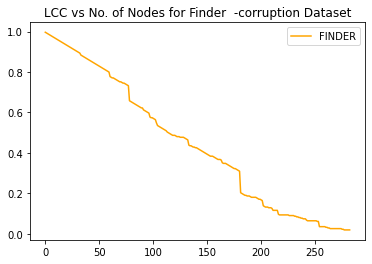

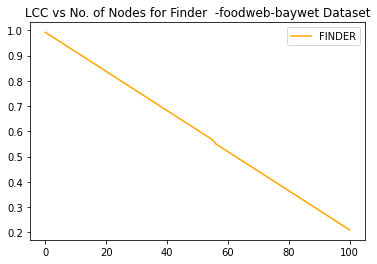

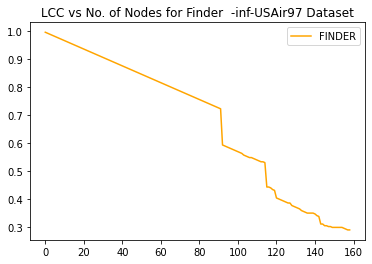

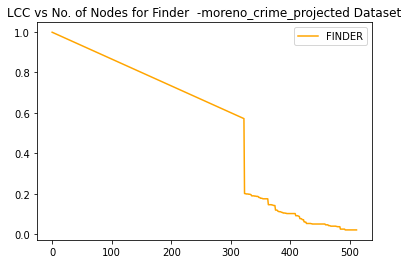

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

file_list = ["corruption","foodweb-baywet","inf-USAir97","moreno_crime_projected"]
path = "/home/bhandk/Desktop/MAS/FINDER/"
for name in file_list:
    GRAPH = nx.read_adjlist("./real/"+name+".txt")
    GRAPH = nx.convert_node_labels_to_integers(GRAPH)
    fname = path+name+".txt"
    initial_lcc = len(max(nx.connected_components(GRAPH), key=len))
    lcc = []
    action_list = np.loadtxt(fname, dtype=int)
    for action in action_list:  
        GRAPH.remove_node(action)
        largest_cc = (len(max(nx.connected_components(GRAPH), key=len))/initial_lcc)
        lcc.append(largest_cc)
    plt.plot(lcc, 'orange', label='FINDER')
    plt.legend()
    plt.title("LCC vs No. of Nodes for Finder  -"+ name +" Dataset")
    plt.show()

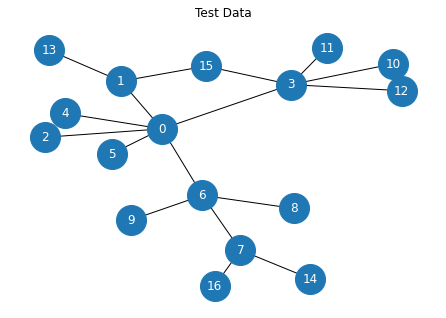

In [5]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(0, 3)
G.add_edge(0, 4)
G.add_edge(0, 5)
G.add_edge(0, 6)
G.add_edge(1, 13)
G.add_edge(1, 15)
G.add_edge(3, 10)
G.add_edge(3, 11)
G.add_edge(3, 12)
G.add_edge(3, 15)
G.add_edge(6, 7)
G.add_edge(6, 8)
G.add_edge(6, 8)
G.add_edge(6, 9)
G.add_edge(7, 16)
G.add_edge(7, 14)
nx.draw(G,nodelist=G.nodes, font_color='white' ,node_size = 900, with_labels=True)
nx.write_edgelist(G, '/home/bhandk/Desktop/MAS/real/test.txt')
plt.title("Test Data")
plt.savefig("test")

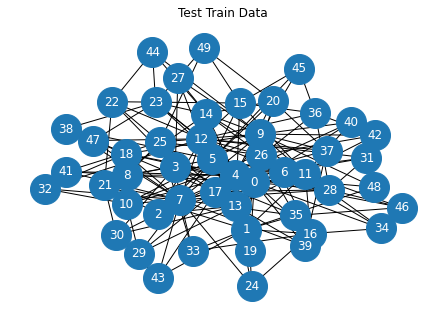

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.barabasi_albert_graph(n=50, m=4)
nx.draw(G,nodelist=G.nodes, font_color='white' ,node_size = 900, with_labels=True)
nx.write_edgelist(G, '/home/bhandk/Desktop/MAS/real/testTrain.txt')
plt.title("Test Train Data")
plt.savefig("testTrain")

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
fh = open("real/testTrain.txt", "rb")
GRAPH = nx.read_edgelist(fh)
fh.close()
nodes = GRAPH.nodes()
map = {n:int(n) for n in nodes}
GRAPH = nx.relabel_nodes(GRAPH, map)
#print(GRAPH.degree())
plt.figure(figsize=(20, 20), dpi=120)
nx.draw(GRAPH,nodelist=GRAPH.nodes, font_color='white' ,node_size = 900, with_labels=True)
#plt.savefig("/home/bhandk/testTrain")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'real/testTrain.txt'

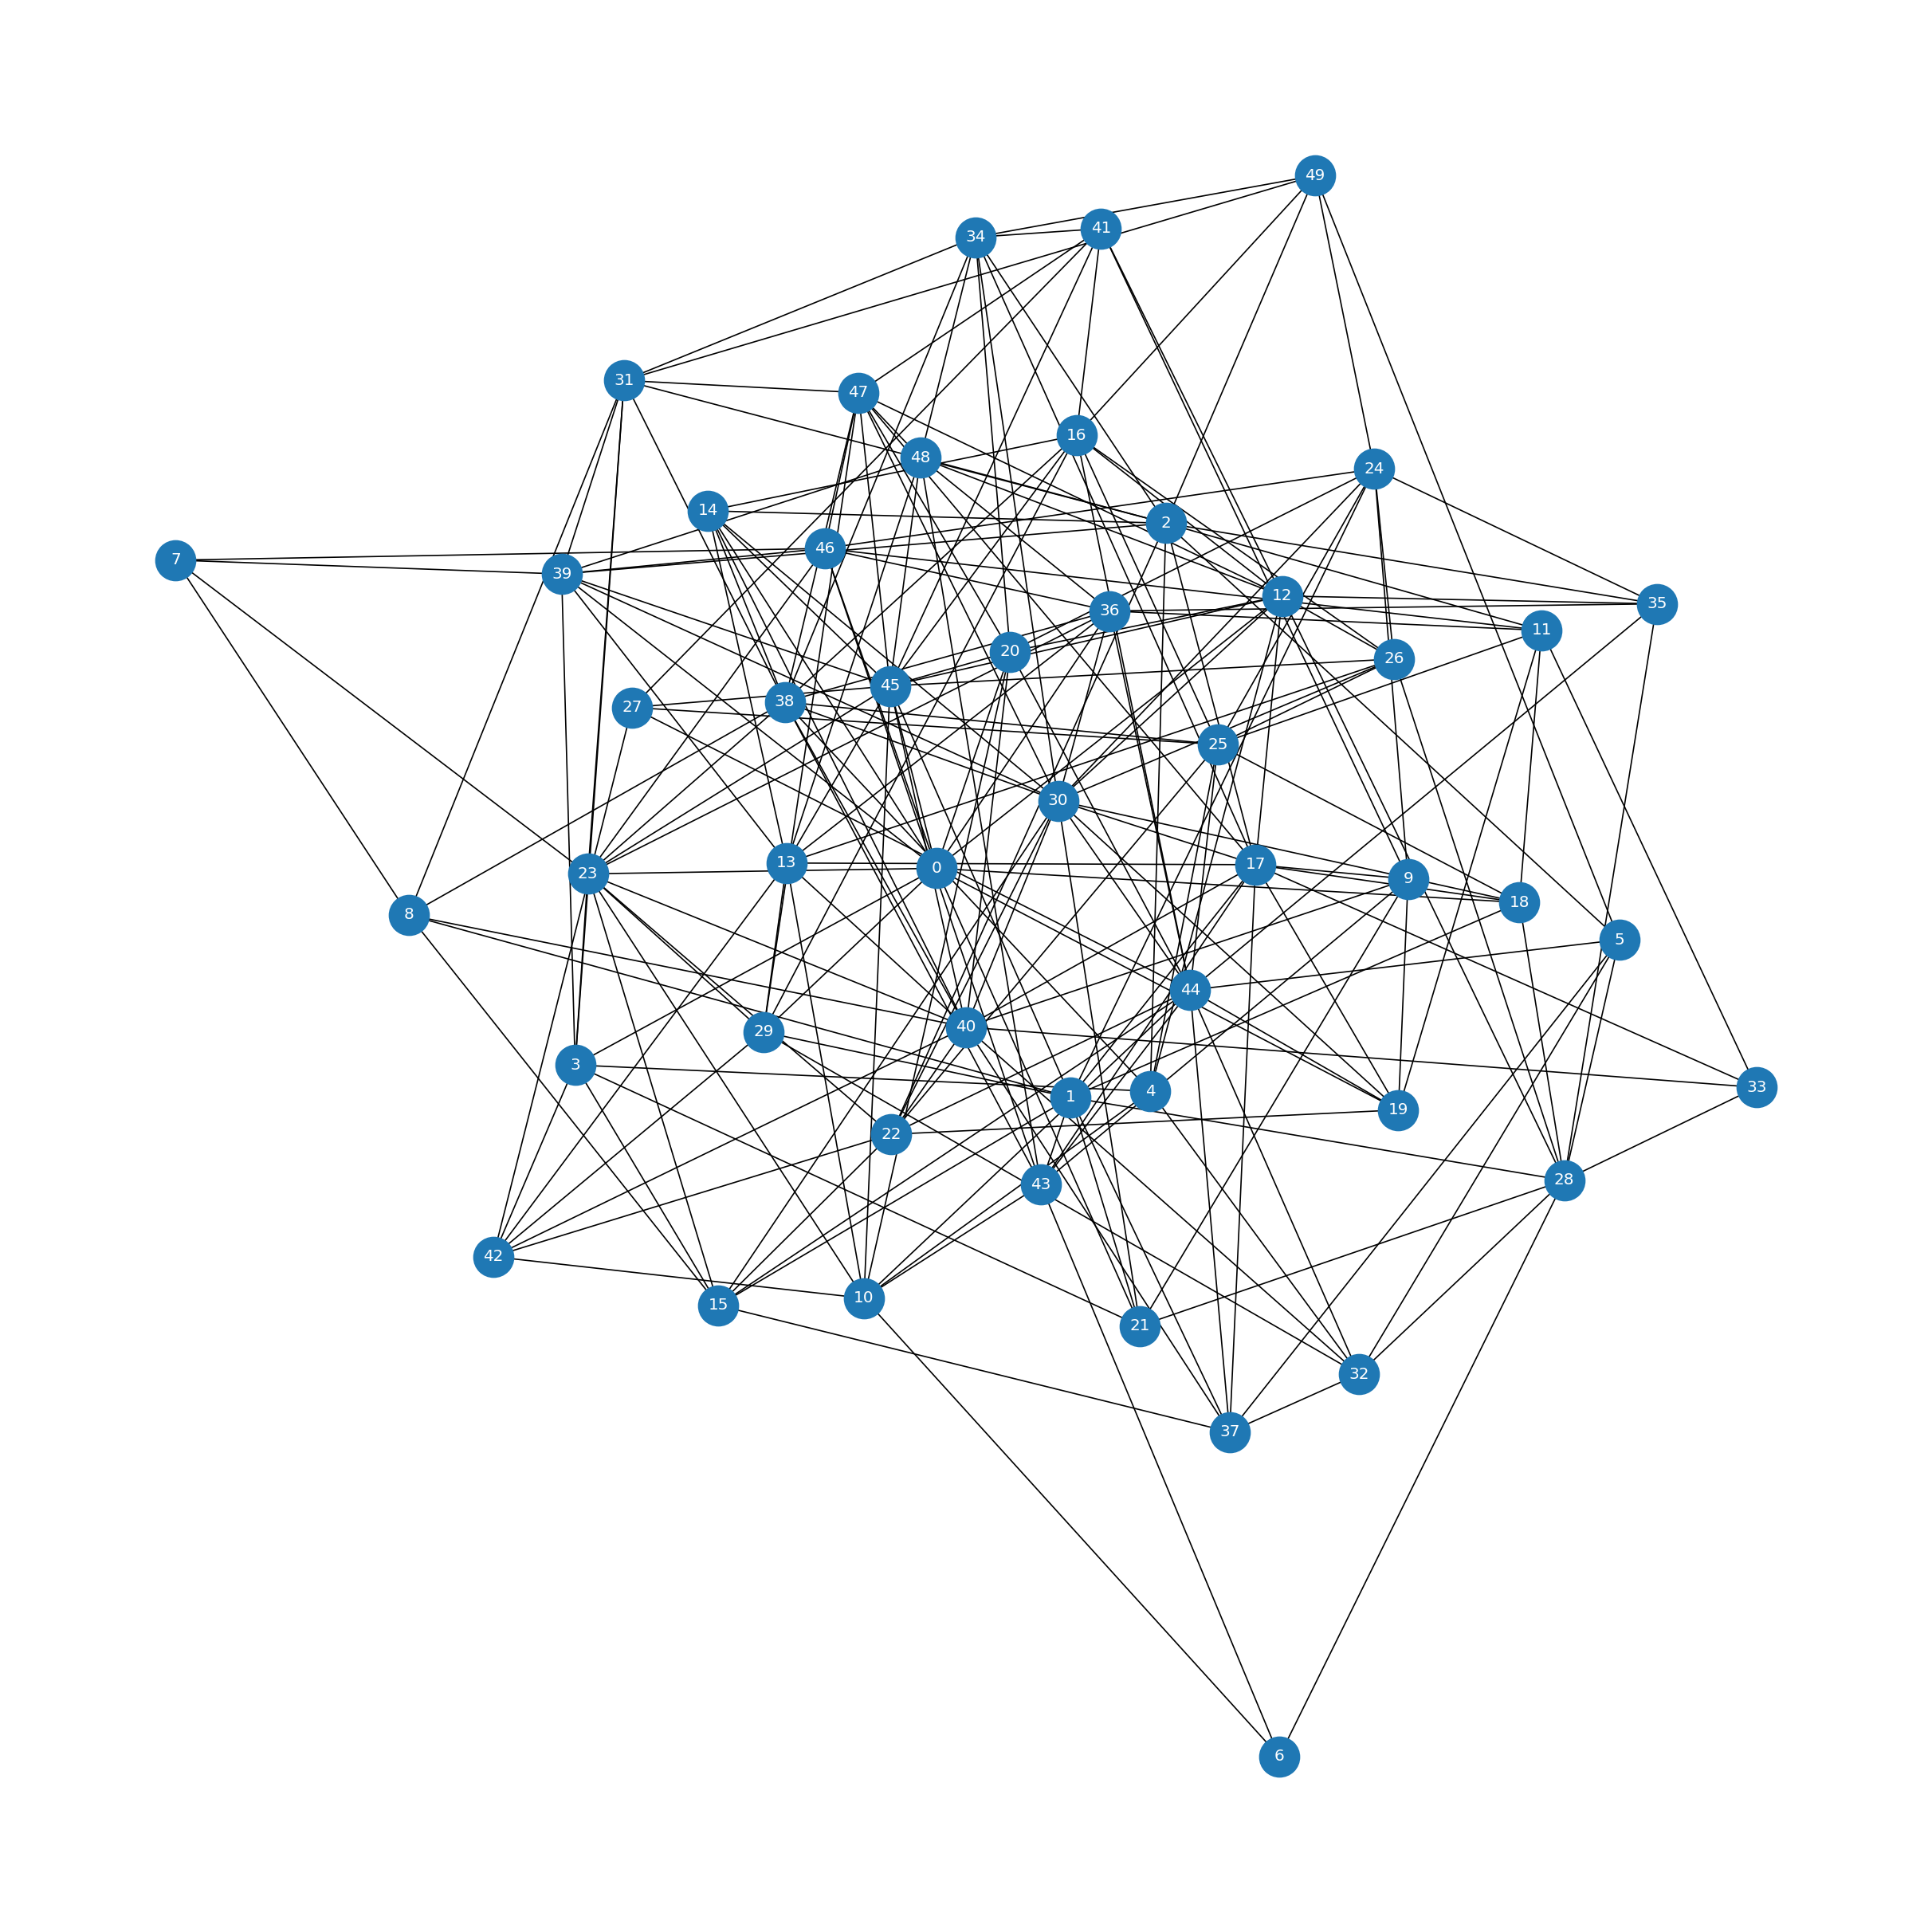

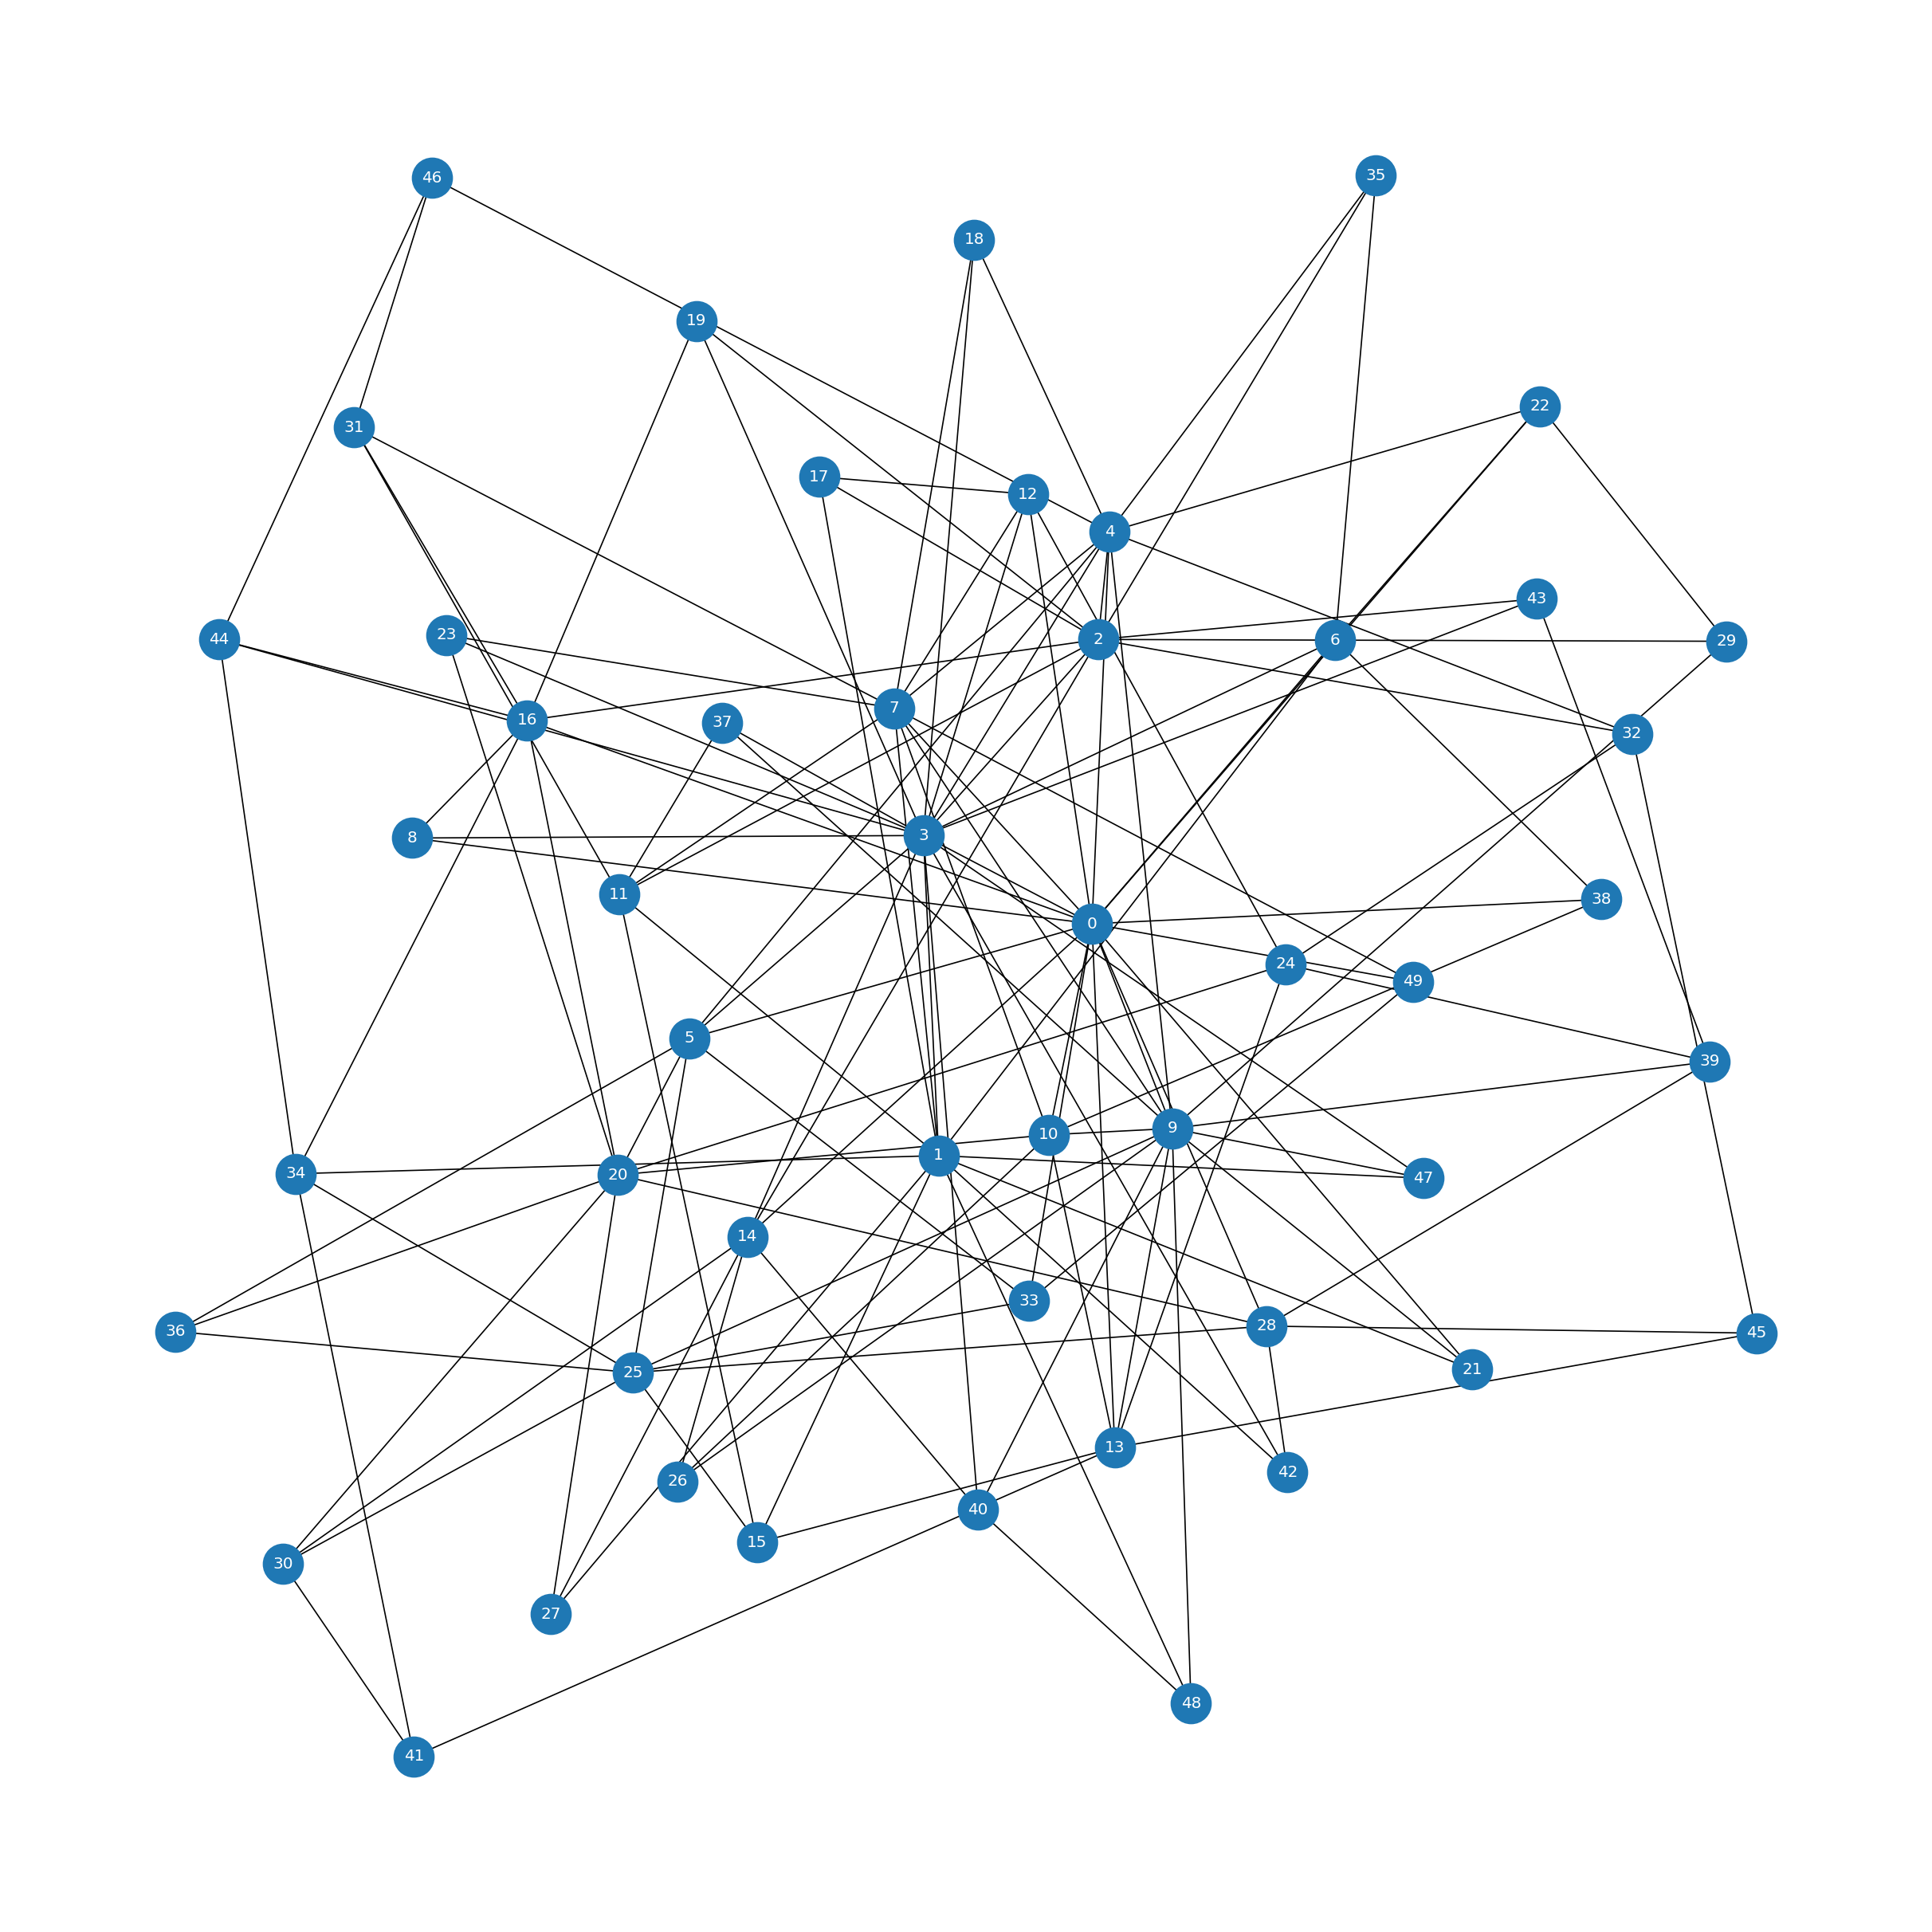

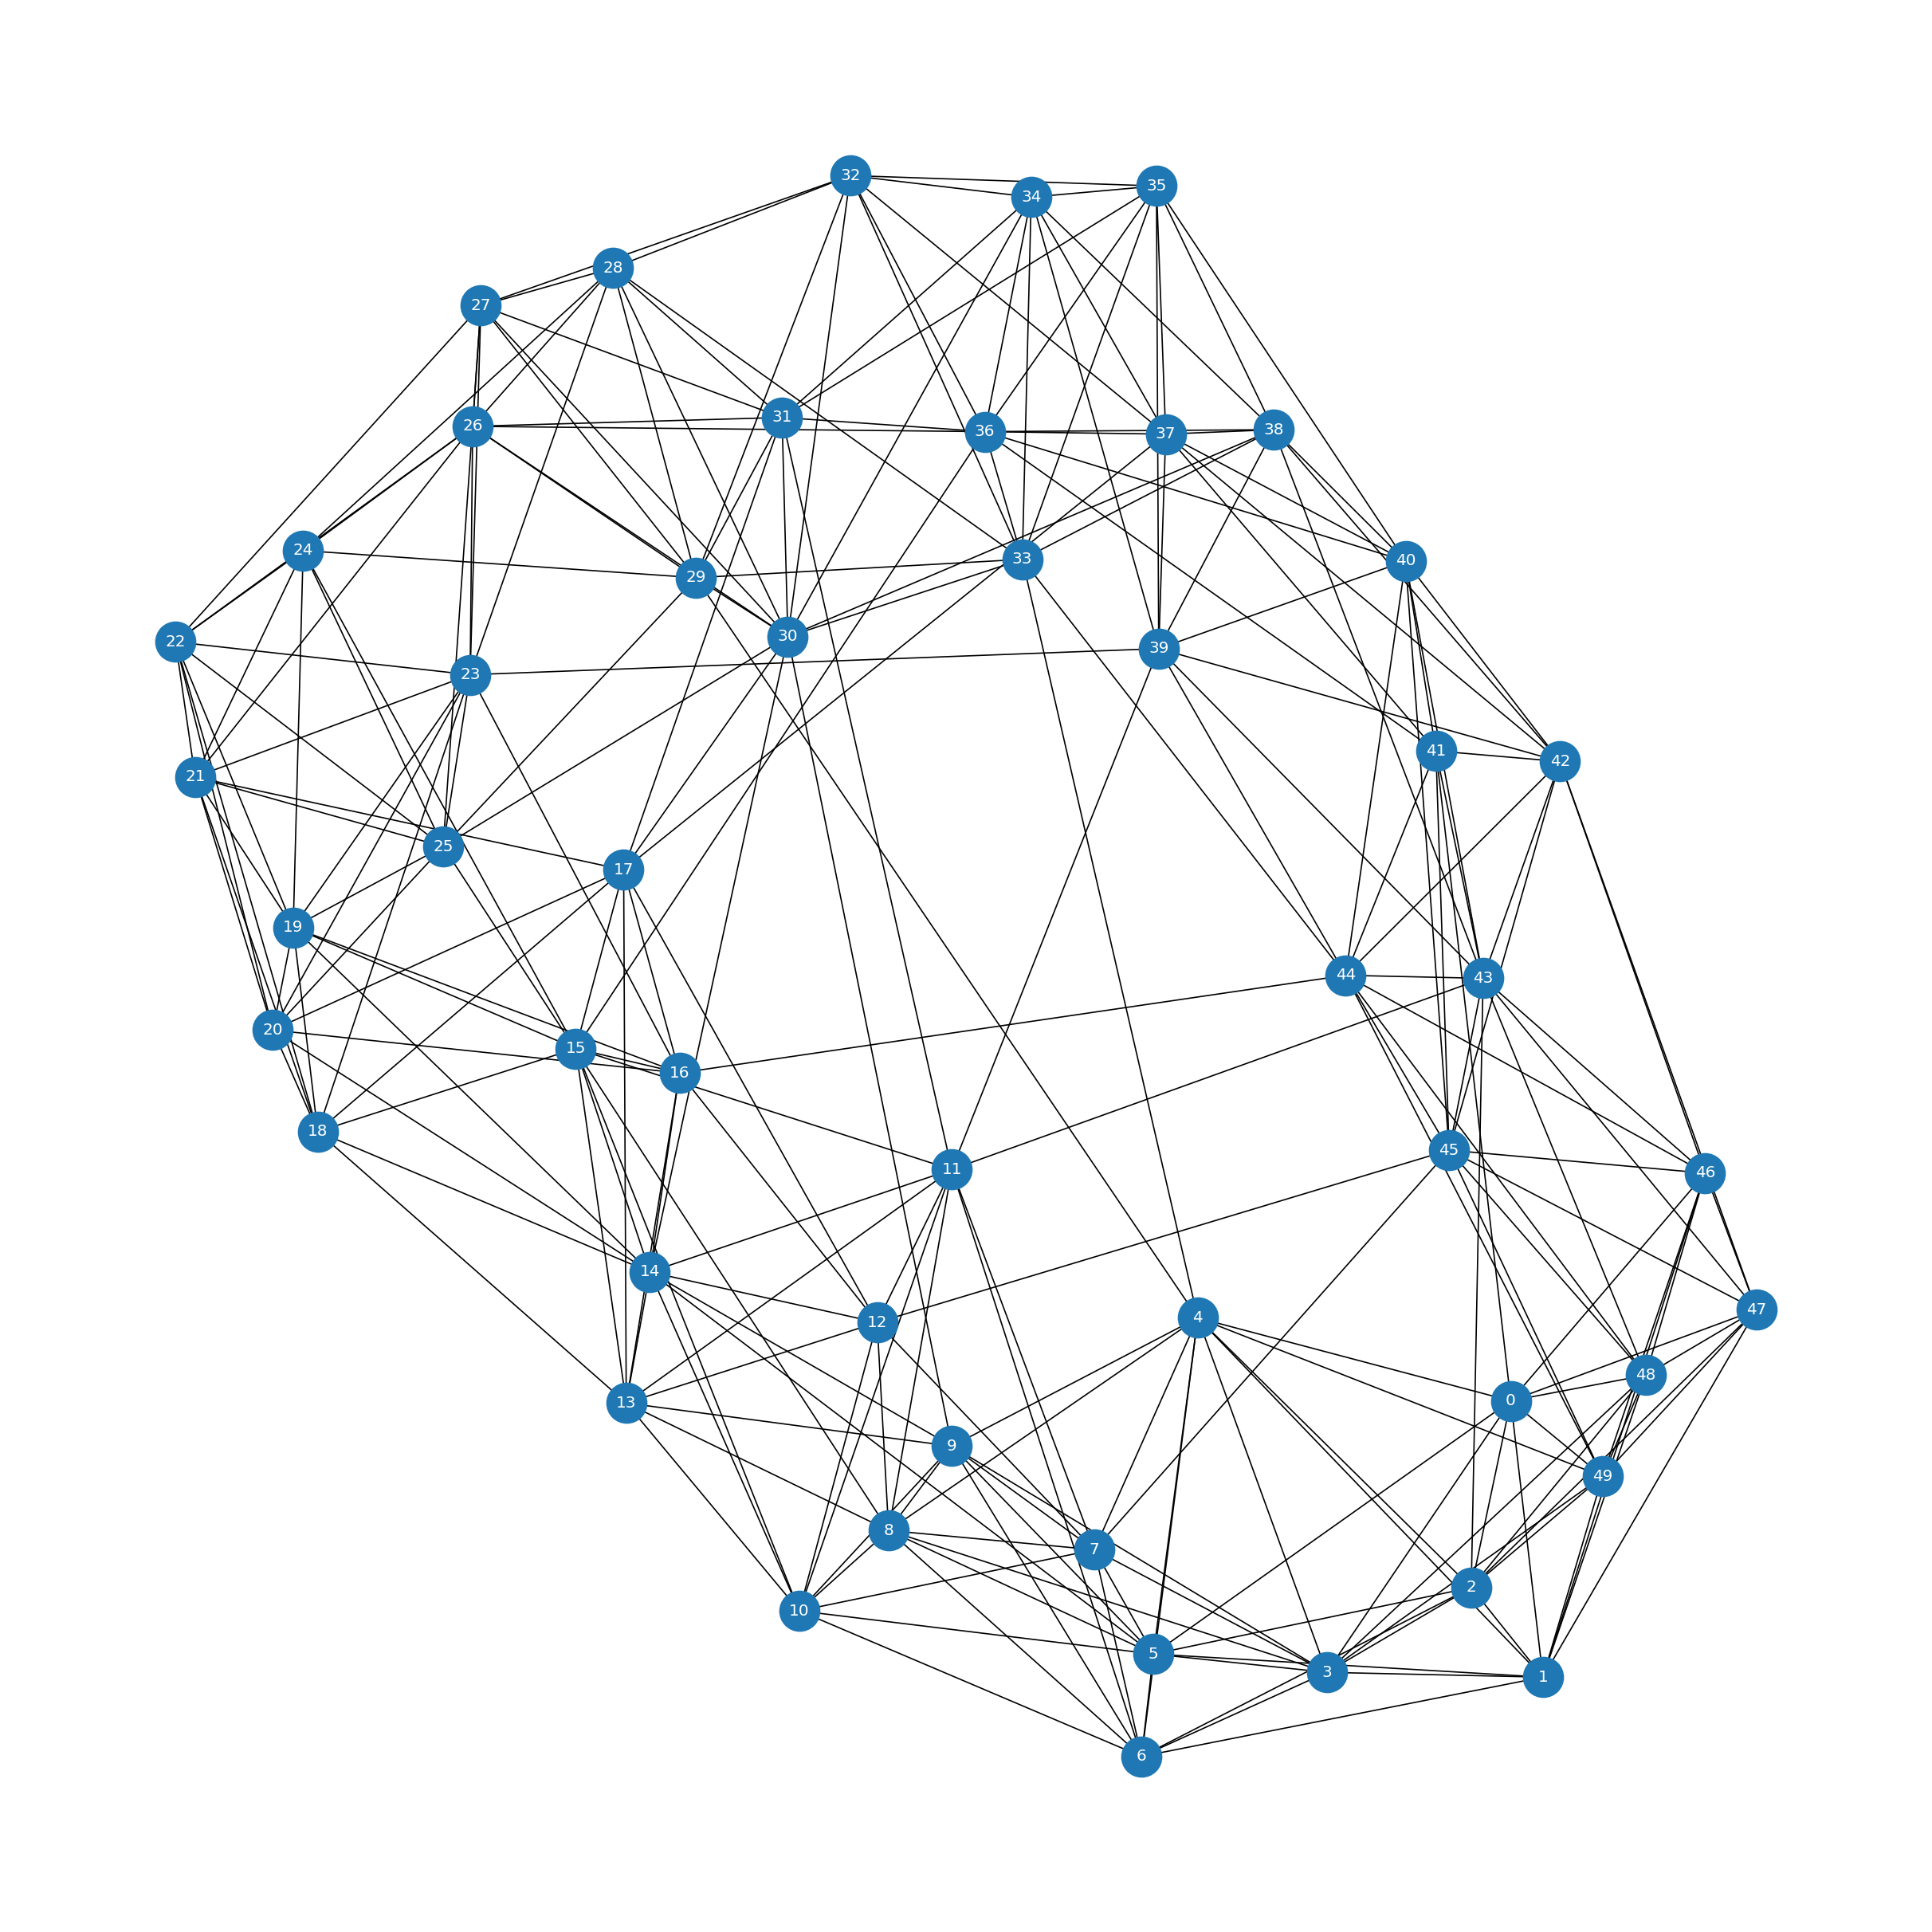

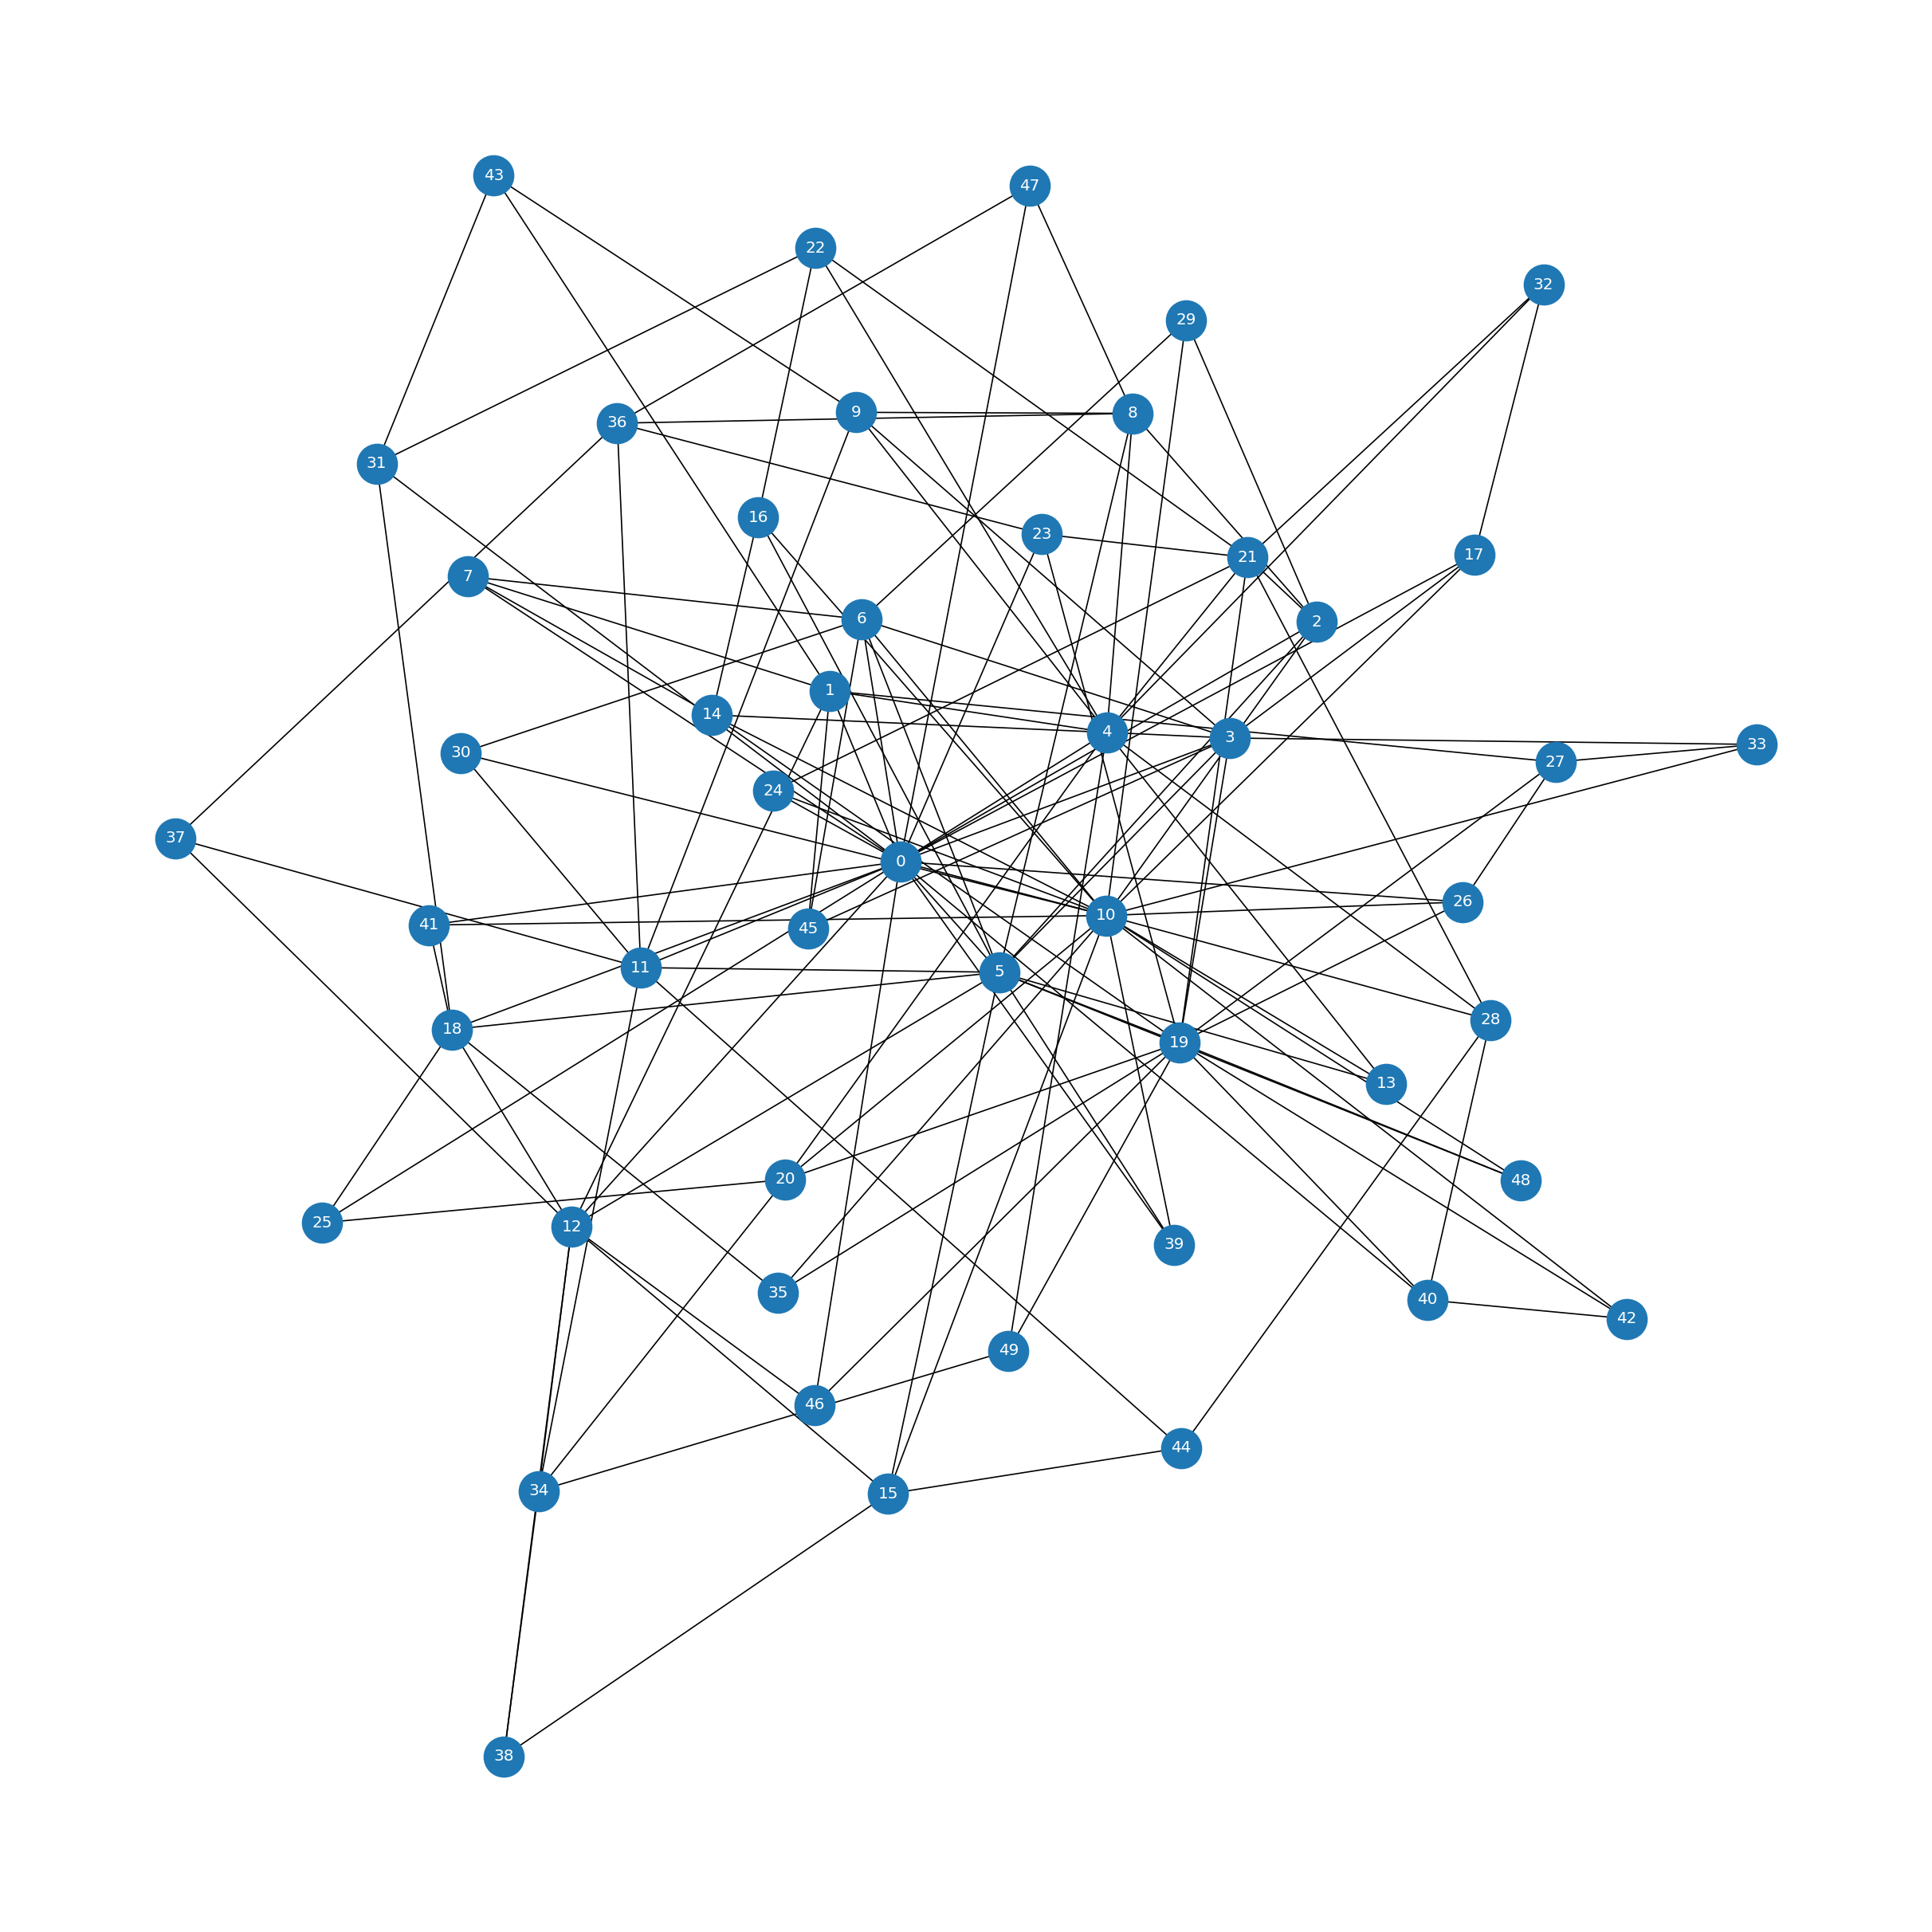

In [2]:
import random
import networkx as nx
def gen_graph(cur_n, g_type):
    if g_type == 'erdos_renyi':
        g = nx.erdos_renyi_graph(n=cur_n, p=random.uniform(0.05,0.25))
    elif g_type == 'powerlaw':
        g = nx.powerlaw_cluster_graph(n=cur_n, m=random.randint(2,4), p=random.uniform(0.01,0.1))
    elif g_type == 'small-world':
        g = nx.connected_watts_strogatz_graph(n=cur_n, k=random.randint(5,10), p=random.uniform(0.01,0.2))
    elif g_type == 'barabasi_albert':
        g = nx.barabasi_albert_graph(n=cur_n, m=random.randint(3,5))
    return g

graph_type = ['erdos_renyi', 'powerlaw','small-world', 'barabasi_albert']
for g_tp in graph_type:
    g = gen_graph(50,g_tp)
    plt.figure(figsize=(15, 20), dpi=120)
    nx.draw(g,nodelist=g.nodes, font_color='white' ,node_size = 900, with_labels=True)
    #plt.savefig("/home/bhandk/testTrain")
    plt.show()

In [7]:
import imageio
filenames=['/home/bhandk/Desktop/MAS/figure/0/'+str(i)+'.png' for i in range(18)]
title = "demo"+'.gif'
with imageio.get_writer(title, mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Create Synthetic Dataset

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
def gen_graph(cur_n, g_type):
    if g_type == 'erdos_renyi':
        g = nx.erdos_renyi_graph(n=cur_n, p=0.1)
    elif g_type == 'powerlaw':
        g = nx.powerlaw_cluster_graph(n=cur_n, m=3, p=0.05)
    elif g_type == 'small-world':
        g = nx.connected_watts_strogatz_graph(n=cur_n, k=5, p=0.1)
    elif g_type == 'barabasi_albert':
        g = nx.barabasi_albert_graph(n=cur_n, m=2)
    return g
number = 1 
graph_type = ['erdos_renyi', 'powerlaw','small-world', 'barabasi_albert']
noderange = [30, 50, 100, 500]
for graphtype in graph_type:
    for nodesize in noderange:
        G = gen_graph(nodesize, graphtype)
        filename = graphtype+'_'+str(nodesize)+'_'+str(number)
        #plt.figure(figsize=(15, 20), dpi=120)
        #nx.draw(G,nodelist=G.nodes, font_color='white' ,node_size = 900, with_labels=True)
        #plt.savefig('/home/bhandk/Desktop/MAS/SyntheticGraph/Synthetic_Figure/'+filename)
        nx.write_edgelist(G, '/home/bhandk/Desktop/MAS/SyntheticGraph/'+filename+'.txt')

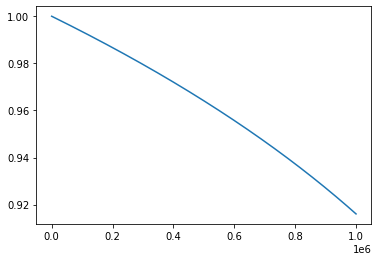

In [13]:
import matplotlib.pyplot as plt

def _get_epsilon(_epsilon_start, _epsilon_end,_step_counter, _epsilon_decay_duration,power):
    decay_steps = min(_step_counter, _epsilon_decay_duration)
    decayed_epsilon = (
        _epsilon_end + (_epsilon_start - _epsilon_end) *
        (1 - decay_steps /_epsilon_decay_duration)**power)
    return decayed_epsilon
ep = []
for _step_counter in range(int(1e6)):
    _epsilon_start, _epsilon_end, _epsilon_decay_duration,power= 1.0,0.15,int(2e6),0.15
    ep.append(_get_epsilon(_epsilon_start, _epsilon_end,_step_counter, _epsilon_decay_duration,power))
plt.plot(ep)
plt.show()

# Properties of Real World Network

In [3]:
import networkx as nx
import numpy as np
def molloy_reed(g):
  all_degree =   np.array(g.degree())[:,1]
  degs = np.delete(all_degree,-1)
  k = degs.mean()
  k2 = np.mean(degs ** 2)
  if k ==0:
    beta = 0
  else:
    beta = k2/k
  return beta
def global_feature(g): 
    subGraph = g.subgraph(np.arange(len(g)-1)) #for supernode
    M = len(subGraph.edges())
    N = len(subGraph)
    degs =   np.array(subGraph.degree())[:,1]
    k1 = degs.mean()
    k2 = np.mean(degs** 2)
    div = k2 - k1**2
    nodes = M
    edges = N
    heterogeneity = div/k1
    density = (2*M)/(N*(N-1))
    resilience = molloy_reed(g)
    global_properties = np.hstack((nodes, edges,density,resilience,heterogeneity)).astype(float)
    return global_properties
#file_list = ["test","testTrain","corruption","foodweb-baywet","inf-USAir97","moreno_crime_projected",'opsahl-openflights','household','faa','facebook','powergrid','netscience']
file_list=[]
homogeneity = ['homogeneous','heterogeneous']
noderange = [30, 50, 100, 500]
for graphtype in homogeneity:
        for nodesize in noderange:
                file_list.append(graphtype+'_'+str(nodesize))
properties=[]
for name in file_list:
    fh = open("../HomogeneityGraph/"+name+".txt", "rb")
    GRAPH = nx.read_edgelist(fh)
    fh.close()
    nodes = GRAPH.nodes()
    map = {n:int(i) for i, n in enumerate(nodes)}
    GRAPH = nx.relabel_nodes(GRAPH, map)
    properties.append([name,global_feature(GRAPH)])
print(properties)

[['homogeneous_30', array([47.        , 28.        ,  0.12433862,  3.69473684,  0.28115502])], ['homogeneous_50', array([7.70000000e+01, 4.90000000e+01, 6.54761905e-02, 3.64516129e+00,
       4.80519481e-01])], ['homogeneous_100', array([1.48000000e+02, 9.30000000e+01, 3.45956054e-02, 3.95973154e+00,
       7.63150247e-01])], ['homogeneous_500', array([7.86000000e+02, 4.65000000e+02, 7.28587319e-03, 4.17228226e+00,
       7.80932447e-01])], ['heterogeneous_30', array([30.        , 22.        ,  0.12987013,  3.32786885,  0.53939394])], ['heterogeneous_50', array([48.        , 35.        ,  0.08067227,  3.32      ,  0.48630952])], ['heterogeneous_100', array([1.17000000e+02, 7.50000000e+01, 4.21621622e-02, 4.25957447e+00,
       1.07658120e+00])], ['heterogeneous_500', array([6.38000000e+02, 4.13000000e+02, 7.49900092e-03, 4.36726703e+00,
       1.25837400e+00])]]


# Different Homophiliy

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def molloy_reed(g):
  all_degree =   np.array(g.degree())[:,1]
  degs = np.delete(all_degree,-1)
  k = degs.mean()
  k2 = np.mean(degs ** 2)
  if k ==0:
    beta = 0
  else:
    beta = k2/k
  return beta
def global_feature(g): 
    subGraph = g#g.subgraph(np.arange(len(g)-1)) #for supernode
    M = len(subGraph.edges())
    N = len(subGraph)
    degs =   np.array(subGraph.degree())[:,1]
    k1 = degs.mean()
    k2 = np.mean(degs** 2)
    div = k2 - k1**2
    heterogeneity = div/k1
    density = (2*M)/(N*(N-1))
    resilience = molloy_reed(g)
    #global_properties = np.hstack((nodes, edges,density,resilience,heterogeneity)).astype(float)
    global_properties = np.hstack((N, M,density,resilience,heterogeneity))
    return global_properties

def gen_graph(cur_n, g_type):
    if g_type == 'erdos_renyi':
        g = nx.erdos_renyi_graph(n=cur_n, p=0.1)
    elif g_type == 'powerlaw':
        g = nx.powerlaw_cluster_graph(n=cur_n, m=3, p=0.05)
    elif g_type == 'small-world':
        g = nx.connected_watts_strogatz_graph(n=cur_n, k=5, p=0.1)
    elif g_type == 'barabasi_albert':
        g = nx.barabasi_albert_graph(n=cur_n, m=3)
    return g
number = 1 
graph_type = ['barabasi_albert']
noderange = [30, 50, 100, 500]
properties = []
for graphtype in graph_type:
    for nodesize in noderange:
        G = gen_graph(nodesize, graphtype)
        filename = graphtype+'_'+str(nodesize)+'_'+str(number)
        #plt.figure(figsize=(15, 20), dpi=120)
        #nx.draw(G,nodelist=G.nodes, font_color='white' ,node_size = 900, with_labels=True)
        #plt.savefig('/home/bhandk/Desktop/MAS/SyntheticGraph/Synthetic_Figure/'+filename)
        #nx.write_edgelist(G, '/home/bhandk/Desktop/MAS/SyntheticGraph/'+filename+'.txt')
        print(global_feature(G))

[30.         81.          0.1862069   6.96226415  1.48888889]
[5.00000000e+01 1.41000000e+02 1.15102041e-01 8.37634409e+00
 2.67914894e+00]
[1.00000000e+02 2.91000000e+02 5.87878788e-02 9.38341969e+00
 3.53051546e+00]
[5.00000000e+02 1.49100000e+03 1.19519038e-02 1.45427996e+01
 8.56718712e+00]


# Create Heterogeneous CV graph

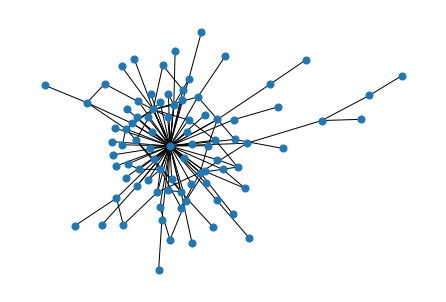

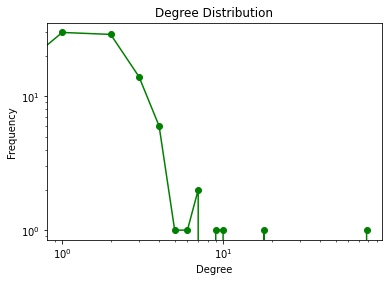

heterogeneous_0 [8.70000000e+01 1.47000000e+02 3.92943063e-02 2.43561644e+01
 2.08247713e+01]


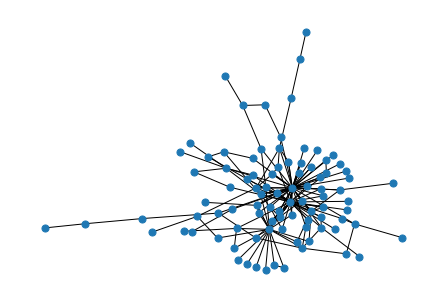

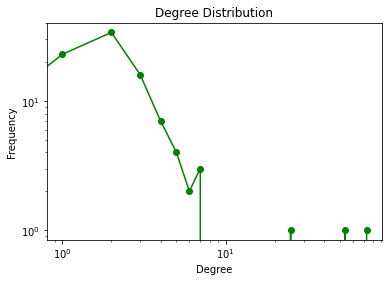

heterogeneous_1 [9.2000000e+01 1.8600000e+02 4.4433827e-02 2.5884097e+01 2.1773726e+01]


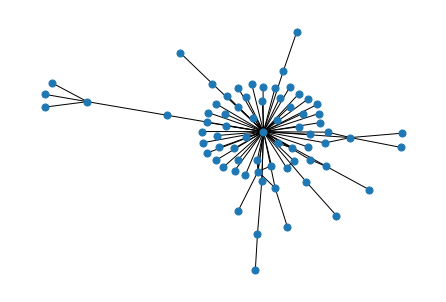

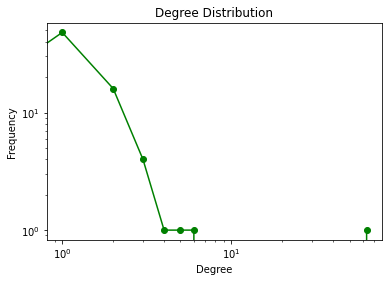

heterogeneous_2 [7.20000000e+01 8.50000000e+01 3.32550861e-02 2.48106509e+01
 2.23094771e+01]


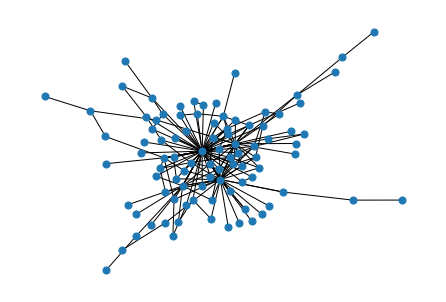

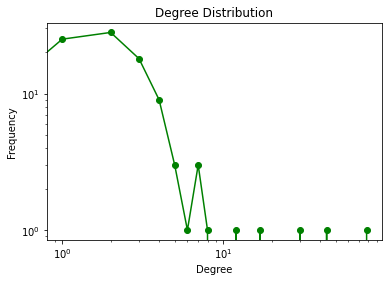

heterogeneous_3 [9.30000000e+01 2.01000000e+02 4.69845722e-02 2.52294264e+01
 2.08465736e+01]


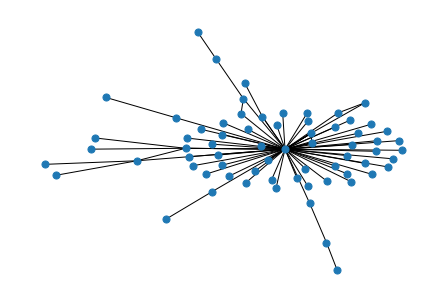

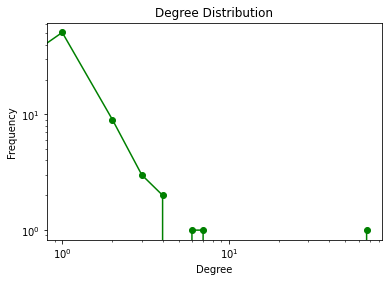

heterogeneous_4 [6.80000000e+01 8.30000000e+01 3.64354697e-02 2.86000000e+01
 2.59925585e+01]


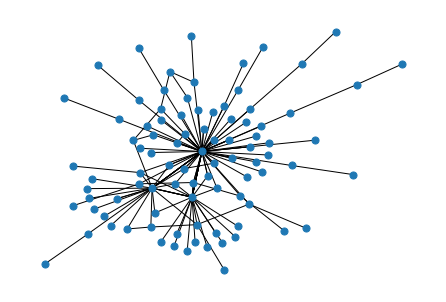

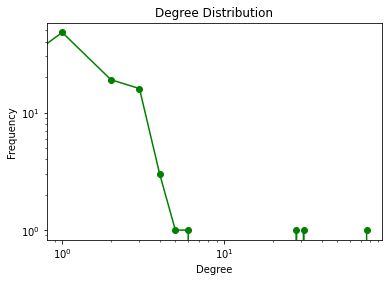

heterogeneous_5 [9.10000000e+01 1.46000000e+02 3.56532357e-02 2.72206897e+01
 2.38391540e+01]


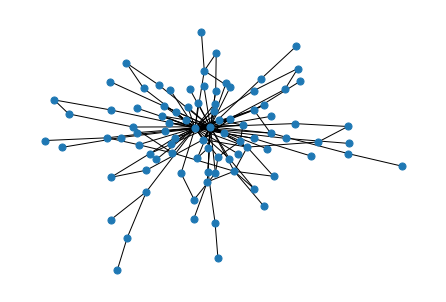

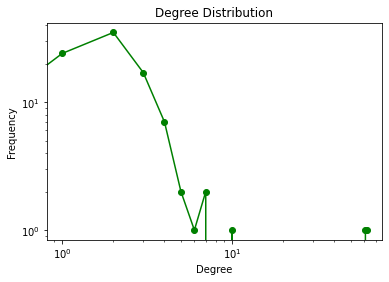

heterogeneous_6 [9.10000000e+01 1.68000000e+02 4.10256410e-02 2.47074627e+01
 2.09445971e+01]


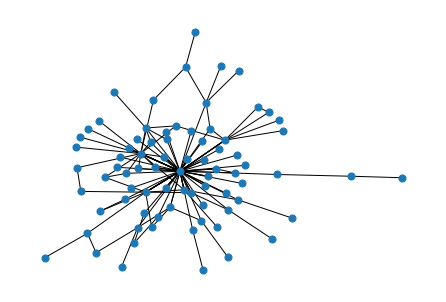

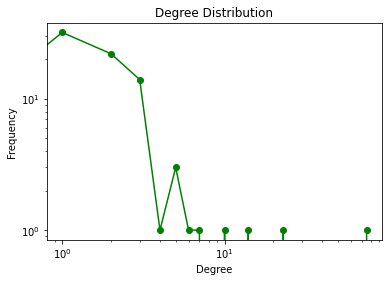

heterogeneous_7 [7.80000000e+01 1.36000000e+02 4.52880453e-02 2.54370370e+01
 2.17775264e+01]


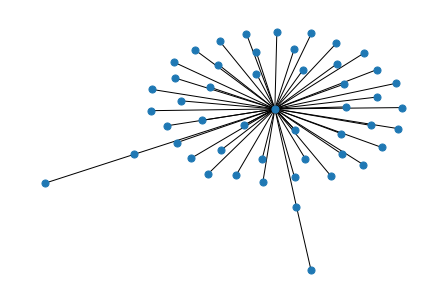

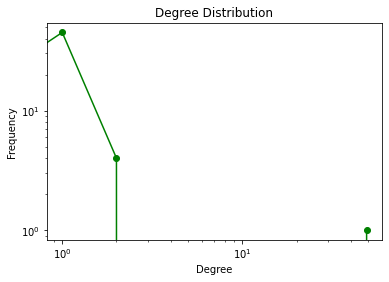

heterogeneous_8 [5.00000000e+01 5.10000000e+01 4.16326531e-02 2.43663366e+01
 2.20972549e+01]


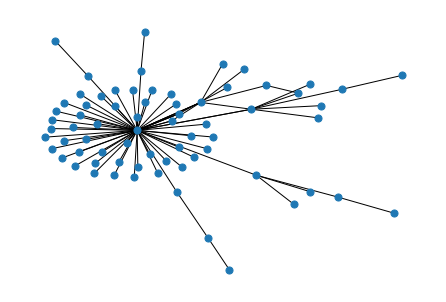

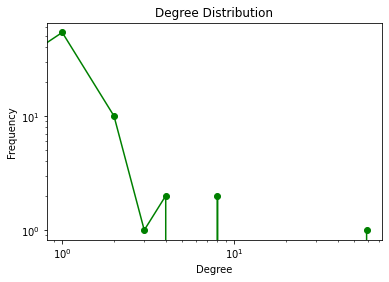

heterogeneous_9 [7.00000000e+01 8.00000000e+01 3.31262940e-02 2.35408805e+01
 2.11142857e+01]


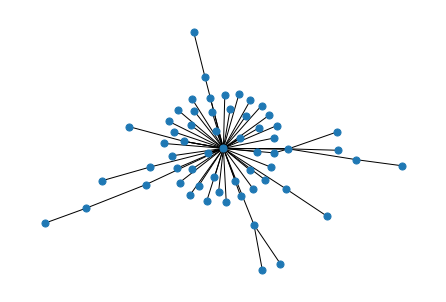

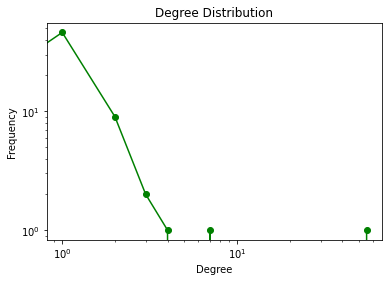

heterogeneous_10 [6.00000000e+01 6.80000000e+01 3.84180791e-02 2.36222222e+01
 2.11892157e+01]


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def molloy_reed(g):
  all_degree =   np.array(g.degree())[:,1]
  degs = np.delete(all_degree,-1)
  k = degs.mean()
  k2 = np.mean(degs ** 2)
  if k ==0:
    beta = 0
  else:
    beta = k2/k
  return beta
def global_feature(g): 
    subGraph = g#g.subgraph(np.arange(len(g)-1)) #for supernode
    M = len(subGraph.edges())
    N = len(subGraph)
    degs =   np.array(subGraph.degree())[:,1]
    k1 = degs.mean()
    k2 = np.mean(degs** 2)
    div = k2 - k1**2
    nodes = N
    edges = M
    heterogeneity = div/k1
    density = (2*M)/(N*(N-1))
    resilience = molloy_reed(g)
    global_properties =np.hstack((nodes, edges,density,resilience,heterogeneity)).astype(float)
    return global_properties

def create_heterogeneous_graph(deg,i,num):
    #create a graph with degrees following a power law distribution
    G = nx.expected_degree_graph(deg, selfloops=False)
    G = G.subgraph(max(nx.connected_components(G), key=len))
    sequence = [val for (node, val) in G.degree()]
    #sequence = nx.random_powerlaw_tree_sequence(100,i, tries=5000)
    G_conf = nx.configuration_model(sequence)   
    G_conf.remove_edges_from(nx.selfloop_edges(G_conf))
    G_conf = G_conf.subgraph(max(nx.connected_components(G_conf), key=len))
    feature = global_feature(G_conf)
    cond = True
    if feature[-1] >=20:
        nx.draw(G_conf,nodelist=G_conf.nodes, font_color='white' ,node_size = 50, with_labels=False)
        file_name =  "../Cross_Validation/heterogeneous_"+str(num)
        nx.write_edgelist(G_conf,file_name+str(".txt"))
        plt.savefig(file_name)
        plt.show()
        degree_freq = nx.degree_histogram(G_conf)
        degrees = range(len(degree_freq))
        plt.loglog(degrees, degree_freq,'go-') 
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.title("Degree Distribution")
        file_name =  "../Cross_Validation/heterogeneous_degree_"
        plt.savefig(file_name+str(num))
        plt.show()
        cond = False
        print("heterogeneous_"+str(num),feature)
    return cond

#for i in np.arange(2.0,3.2,0.2):
cond = True
num = 0 
while cond:
    i = 2.0
    deg = nx.utils.powerlaw_sequence(100, i) #100 nodes, power-law exponent 2.5
    #deg = nx.random_powerlaw_tree_sequence(100, tries=5000)
    cond = create_heterogeneous_graph(deg,i,num)
    if not(cond):
        num += 1
        cond = True
        if num > 10 :
            cond = False


# Create Homogeneous CV graph

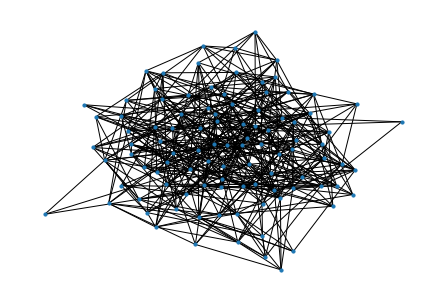

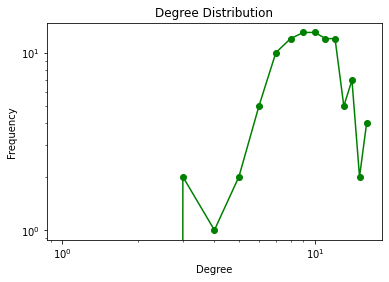

homogeneous_0 [1.00000000e+02 4.98000000e+02 1.00606061e-01 1.07971602e+01
 8.29156627e-01]


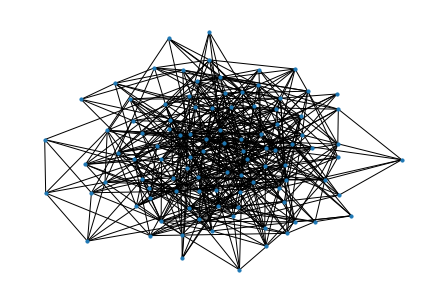

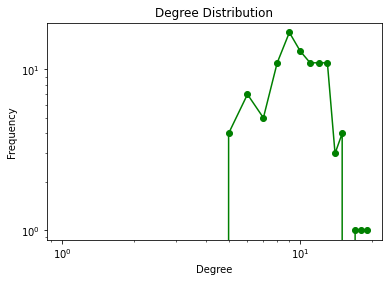

homogeneous_1 [1.00000000e+02 5.10000000e+02 1.03030303e-01 1.10118694e+01
 7.94117647e-01]


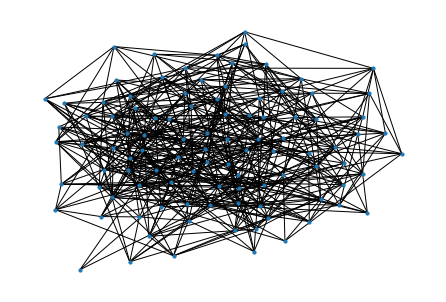

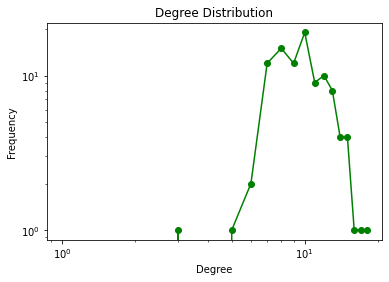

homogeneous_2 [1.00000000e+02 5.06000000e+02 1.02222222e-01 1.08525896e+01
 7.10039526e-01]


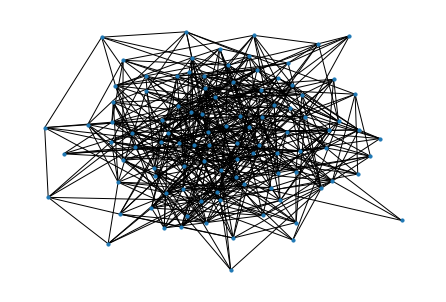

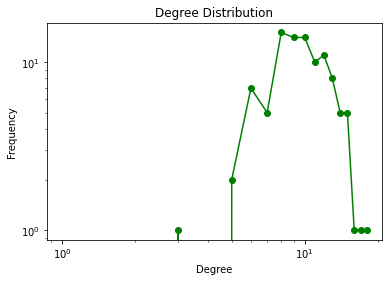

homogeneous_3 [1.00000000e+02 5.09000000e+02 1.02828283e-01 1.09960396e+01
 7.92495088e-01]


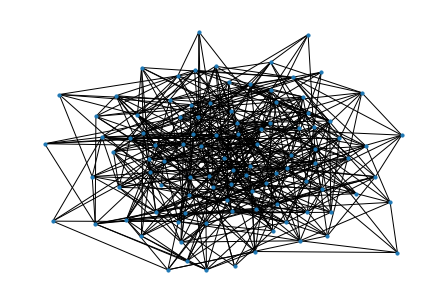

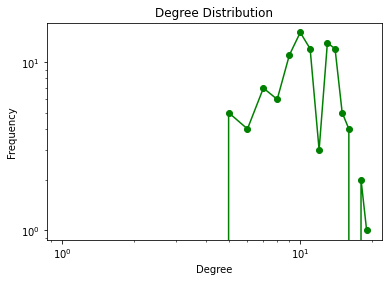

homogeneous_4 [1.00000000e+02 5.47000000e+02 1.10505051e-01 1.18866359e+01
 9.22888483e-01]


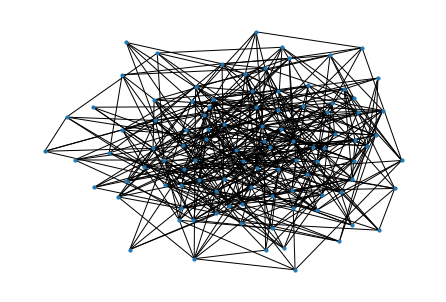

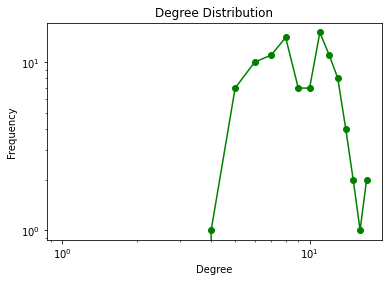

homogeneous_5 [1.00000000e+02 4.79000000e+02 9.67676768e-02 1.05424974e+01
 9.33569937e-01]


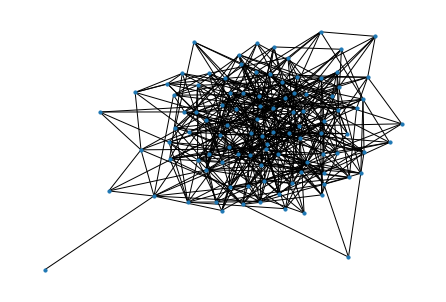

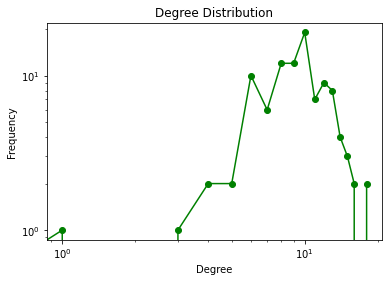

homogeneous_6 [1.00000000e+02 4.88000000e+02 9.85858586e-02 1.06221294e+01
 9.98196721e-01]


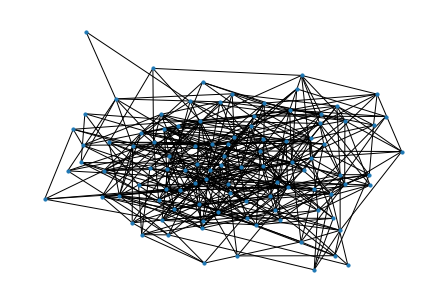

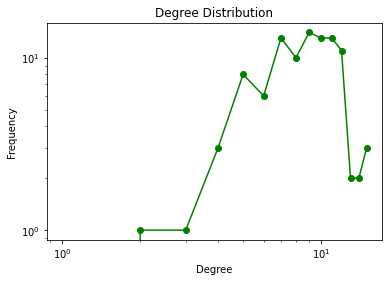

homogeneous_7 [1.00000000e+02 4.47000000e+02 9.03030303e-02 9.81306306e+00
 8.47472036e-01]


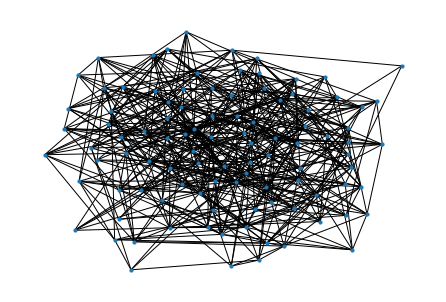

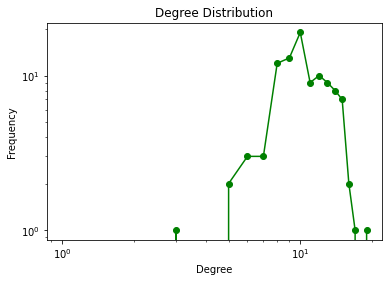

homogeneous_8 [1.00000000e+02 5.38000000e+02 1.08686869e-01 1.14967074e+01
 7.54869888e-01]


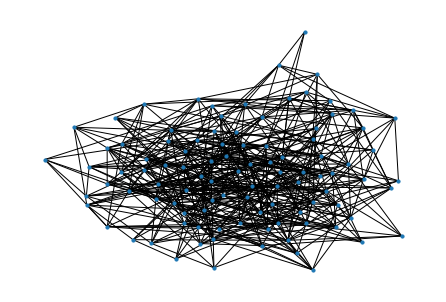

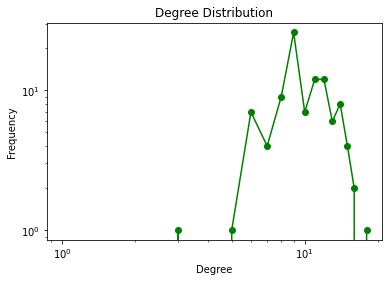

homogeneous_9 [1.00000000e+02 5.15000000e+02 1.04040404e-01 1.10547945e+01
 7.31067961e-01]


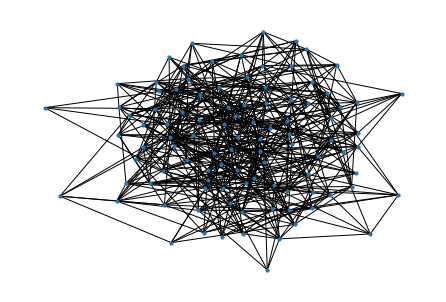

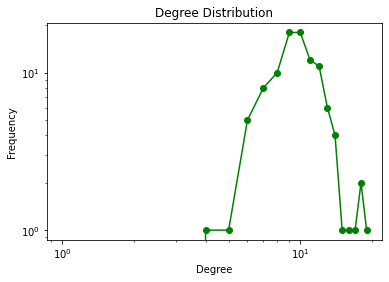

homogeneous_10 [1.00000000e+02 5.09000000e+02 1.02828283e-01 1.09504950e+01
 7.47308448e-01]


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def molloy_reed(g):
  all_degree =   np.array(g.degree())[:,1]
  degs = np.delete(all_degree,-1)
  k = degs.mean()
  k2 = np.mean(degs ** 2)
  if k ==0:
    beta = 0
  else:
    beta = k2/k
  return beta
def global_feature(g): 
    subGraph = g#g.subgraph(np.arange(len(g)-1)) #for supernode
    M = len(subGraph.edges())
    N = len(subGraph)
    degs =   np.array(subGraph.degree())[:,1]
    k1 = degs.mean()
    k2 = np.mean(degs** 2)
    div = k2 - k1**2
    nodes = N
    edges = M
    heterogeneity = div/k1
    density = (2*M)/(N*(N-1))
    resilience = molloy_reed(g)
    global_properties =np.hstack((nodes, edges,density,resilience,heterogeneity)).astype(float)
    return global_properties

def create_homogeneous_graph(num):
    #create a graph with degrees following a power law distribution
    G_conf = nx.erdos_renyi_graph(n=100, p=0.1)
    feature = global_feature(G_conf)
    cond = True
    if feature[-1] <=1:
        nx.draw(G_conf,nodelist=G_conf.nodes, font_color='white' ,node_size = 10, with_labels=False)
        file_name =  "../Cross_Validation/homogeneous_"+str(num)
        nx.write_edgelist(G_conf,file_name+str(".txt"))
        plt.savefig(file_name)
        plt.show()
        degree_freq = nx.degree_histogram(G_conf)
        degrees = range(len(degree_freq))
        plt.loglog(degrees, degree_freq,'go-') 
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.title("Degree Distribution")
        file_name_deg =  "../Cross_Validation/homogeneous_degree_"
        plt.savefig(file_name_deg+str(num))
        plt.show()
        cond = False
        print("homogeneous_"+str(num),feature)
    return cond

#for i in np.arange(2.0,3.2,0.2):
cond = True
num = 0 
while cond:
    cond = create_homogeneous_graph(num)
    if not(cond):
        num += 1
        cond = True
        if num > 10 :
            cond = False
